In [1]:
from google.colab import drive
drive.mount('./mydrive')

Mounted at ./mydrive


In [25]:
pwd

'/content/mydrive/MyDrive/brainimages'

In [8]:
ls

 brainimages/  'Colab Notebooks'/   dogsandcats/


In [9]:
cd brainimages/

/content/mydrive/MyDrive/brainimages


In [10]:
import tensorflow as tf
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Activation, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import PIL.Image as pilmg

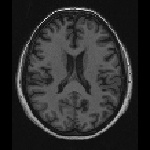

In [27]:
img = pilmg.open('/content/mydrive/MyDrive/brainimages/train/normal/normal_train_1.jpg')
img

In [ ]:
img_arr = np.array(img)
img_arr

In [30]:
img_arr.shape

(150, 150, 3)

In [11]:
# 이미지 변형(훈련 데이터 증강)

train_datagen = ImageDataGenerator(rescale = 1./255,                 # 이미지 크기 변경, RGB값을 0~1로 정규화
                                   horizontal_flip = True,           # 수평 대칭 이미지 생성
                                   width_shift_range = 0.1,          # 전체 크기의 10% 범위에서 좌우 이동
                                   rotation_range = 5,               # 정해진 각도만큼 이미지 회전
                                  #  sheer_range = 0.7,
                                   zoom_range = [0.9, 2],            # 정해진 범위 안에서 축소 또는 확대
                                   vertical_flip = True,             # 수직 대칭 이미지 생성
                                   fill_mode = 'nearest')            # 이미지 축소/회전 시, 빈공간을 어떻게 채울지 결정

In [12]:
train_generator = train_datagen.flow_from_directory('train',         # 학습셋 폴더 위치
                                  target_size = (150, 150),
                                  batch_size = 5,
                                  class_mode = 'binary')

Found 160 images belonging to 2 classes.


In [13]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
test_generator = test_datagen.flow_from_directory(
    './test',
    target_size = (150, 150),                                        # 임의로 준다
    batch_size = 5,
    class_mode = 'binary'
)

Found 120 images belonging to 2 classes.


In [16]:
test_generator

In [ ]:
train_generator.next()[0].shape

In [17]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape = (150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(2))                                              # 폴더안에 normal, ad 두 개가 있음
model.add(Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 activation (Activation)     (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 72, 72, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                    

In [18]:
# y(label) : binary
# abnormal, normal : 0, 1

# y(label)  : one_hot
# normal : [1, 0]
# abnormal : [0, 1]

# y(label) : 0, 1, 2, 3, ... => loss를 'sparse_categorical_crossentropy' 으로 지정 해주면 자동으로 one_hot으로 바꿔준다

In [19]:
adam = optimizers.Adam(learning_rate = 0.0002)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [20]:
hist = model.fit(
    train_generator,                            #  앞서 만든 train_generator 를 학습 모델로 사용
    # steps_per_epochs = 100,                   # 이미지 생성기에서 몇개의 샘플 뽑을지 결정
    epochs = 20,                                # 전체 데이터 20번 학습
    validation_data = test_generator,           # 앞서 만든 test_generator 를 테스트 셋으로 사용
    validation_steps = 20                       # 한 번 가져올 때마다 20개 씩 가져옴           
)

Epoch 1/20
32/32 [==============================] - 64s 2s/step - loss: 0.7105 - accuracy: 0.4563 - val_loss: 0.6865 - val_accuracy: 0.5200
Epoch 2/20
32/32 [==============================] - 5s 158ms/step - loss: 0.6930 - accuracy: 0.5250 - val_loss: 0.6930 - val_accuracy: 0.4600
Epoch 3/20
32/32 [==============================] - 2s 77ms/step - loss: 0.6886 - accuracy: 0.5125 - val_loss: 0.6820 - val_accuracy: 0.5200
Epoch 4/20
32/32 [==============================] - 2s 65ms/step - loss: 0.6916 - accuracy: 0.5312 - val_loss: 0.6774 - val_accuracy: 0.5700
Epoch 5/20
32/32 [==============================] - 2s 63ms/step - loss: 0.6746 - accuracy: 0.6375 - val_loss: 0.7179 - val_accuracy: 0.4800
Epoch 6/20
32/32 [==============================] - 2s 63ms/step - loss: 0.6651 - accuracy: 0.6313 - val_loss: 0.6719 - val_accuracy: 0.5000
Epoch 7/20
32/32 [==============================] - 2s 63ms/step - loss: 0.6586 - accuracy: 0.5875 - val_loss: 0.6375 - val_accuracy: 0.7700
Epoch 8/20
32

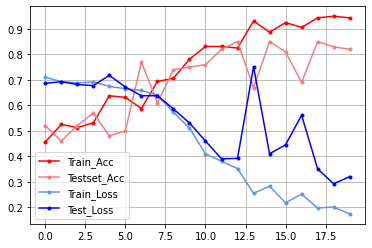

In [21]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

x_len = np.arange(len(loss))
plt.plot(x_len, acc, marker = '.', c = 'red', label = 'Train_Acc')
plt.plot(x_len, val_acc, marker = '.', c = 'lightcoral', label = 'Testset_Acc')
plt.plot(x_len, loss, marker = '.', c = 'cornflowerblue', label = 'Train_Loss')
plt.plot(x_len, val_loss, marker = '.', c = 'blue', label = 'Test_Loss')

plt.legend()
plt.grid()
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
transfer_model = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))        # include_top : Dense layer 계층
transfer_model.trainable = False         # 추가로 train하지 않겠다
transfer_model.summary()


58900480/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                              

In [ ]:
finetune_model = Sequential()
finetune_model.add(transfer_model)
finetune_model.add(Flatten())
finetune_model.add(Dense(64, activation = 'relu'))
finetune_model.add(Dense(32, activation = 'relu'))
finetune_model.add(Dense(2, activation = 'softmax'))
finetune_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_6 (Dense)             (None, 64)                524352    
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 2)                 66        
                                                                 
Total params: 15,241,186
Trainable params: 526,498
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
finetune_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
hist = finetune_model.fit(
    train_generator,
    epochs = 50,
    validation_data = test_generator,
    validation_steps = 4
)

Epoch 1/50
32/32 [==============================] - 4s 84ms/step - loss: 0.7197 - accuracy: 0.5375 - val_loss: 0.5296 - val_accuracy: 0.7500
Epoch 2/50
32/32 [==============================] - 2s 74ms/step - loss: 0.5260 - accuracy: 0.7125 - val_loss: 0.5288 - val_accuracy: 0.7000
Epoch 3/50
32/32 [==============================] - 2s 73ms/step - loss: 0.3905 - accuracy: 0.8313 - val_loss: 0.3165 - val_accuracy: 0.9500
Epoch 4/50
32/32 [==============================] - 2s 72ms/step - loss: 0.3404 - accuracy: 0.8938 - val_loss: 0.3365 - val_accuracy: 0.8500
Epoch 5/50
32/32 [==============================] - 2s 72ms/step - loss: 0.3430 - accuracy: 0.8938 - val_loss: 0.3909 - val_accuracy: 0.8500
Epoch 6/50
32/32 [==============================] - 2s 72ms/step - loss: 0.2664 - accuracy: 0.9250 - val_loss: 0.2184 - val_accuracy: 0.9500
Epoch 7/50
32/32 [==============================] - 2s 73ms/step - loss: 0.2721 - accuracy: 0.9000 - val_loss: 0.1335 - val_accuracy: 1.0000
Epoch 8/50
32